## Тарабонда Герман

### Пункт (а)

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_mean_waiting_time(n: int, alpha: float):
    waiting_times = np.zeros(n)
    for _ in range(1000):
        waiting_times += np.sort(np.random.exponential(alpha, n))
    waiting_times /= 1000
    return waiting_times

В данном эксперименте все достаточно просто. Изначально первые люди заняли очередь. Затем $n$ людей (у меня количество людей совпадает с количеством окон, так как большее количество не имеет значения) стоят в очереди. Также нумерация начинается с 1 только для тех людей, которые стоят в очереди. И тогда время ожидания $i$-го человека -- это $X_{(i)}$ время обслуживания. Тогда время ожидания должны быть как: $X_{(1)}, X_{(2)}, \dots , X_{(n)}$

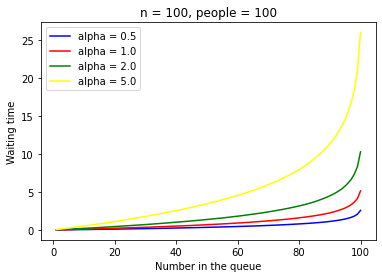

In [3]:
n_1 = 100
people_1 = n_1
people_nums_1 = range(1, people_1 + 1)
alphas_1 = [(0.5, 'blue'), (1.0, 'red'), (2.0, 'green'), (5.0, 'yellow')]

#plot graphics
for alpha_1, color_1 in alphas_1:
    plt.plot(people_nums_1,
             calculate_mean_waiting_time(n_1, alpha_1),
             color=color_1,
             label=f'alpha = {alpha_1}')
plt.legend()
plt.xlabel('Number in the queue')
plt.ylabel('Waiting time')
plt.title("n = 100, people = 100")
plt.show()

В данной зависимости от параметра $\alpha$ можно заметить, что время ожидания похожи на теоретически выведенные с практики: $X_{(1)} \sim Exp(\alpha)$ и $X_{(k+1)}-X_{(k)} \sim Exp((n-k)\alpha)$

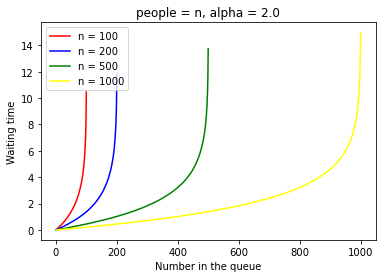

In [4]:
ns = [(100, 'red'), (200, 'blue'), (500, 'green'), (1000, 'yellow')]
alpha = 2.0

#plot graphics
for n, color in ns:
    people = n
    people_nums = range(1, people + 1)
    plt.plot(people_nums,
             calculate_mean_waiting_time(n, alpha),
             color=color,
             label=f'n = {n}')
plt.legend()
plt.xlabel('Number in the queue')
plt.ylabel('Waiting time')
plt.title("people = n, alpha = 2.0")
plt.show()

Здесь в целом логично, что чем больше окон, тем меньше время ожидание для $i$-го человека

### Пункт (б)


In [5]:
def calculate_mean_waiting_time_more_than_2(n: int, people: int, alpha: float):
    waiting_times = np.zeros(people)
    for _ in range(1000):
        exp_times = np.zeros(people)
        windows = np.random.exponential(alpha, n).tolist()
        heapq.heapify(windows)
        for i in range(people):
            waiting_time = heapq.heappop(windows)
            exp_times[i] = waiting_time
            heapq.heappush(windows, waiting_time + np.random.exponential(alpha))
        waiting_times += exp_times
    waiting_times /= 1000
    return waiting_times

В этом эксперименте мы рассматриваем ситуацию следующим образом. Изначально первые люди заняли места. Затем пришло $\texttt{people}$ людей. И каждый следующий в очереди будет приходить в то окно, которое раньше всего освободиться.

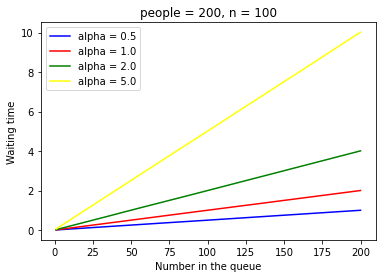

In [6]:
n = 100
people = 200
people_nums = range(1, people + 1)
alphas = [(0.5, 'blue'), (1.0, 'red'), (2.0, 'green'), (5.0, 'yellow')]

#plot graphics
for alpha, color in alphas:
    plt.plot(people_nums,
             calculate_mean_waiting_time_more_than_2(n, people, alpha),
             color=color,
             label=f'alpha = {alpha}')
plt.legend()
plt.xlabel('Number in the queue')
plt.ylabel('Waiting time')
plt.title("people = 200, n = 100")
plt.show()

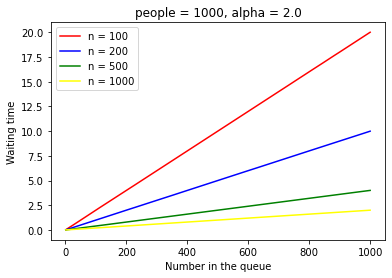

In [7]:
ns = [(100, 'red'), (200, 'blue'), (500, 'green'), (1000, 'yellow')]
people = 1000
people_nums = range(1, people + 1)
alpha = 2.0

#plot graphics
for n, color in ns:
    plt.plot(people_nums,
             calculate_mean_waiting_time_more_than_2(n, people, alpha),
             color=color,
             label=f'n = {n}')
plt.legend()
plt.xlabel('Number in the queue')
plt.ylabel('Waiting time')
plt.title("people = 1000, alpha = 2.0")
plt.show()

В этих случаях довольно ярко видна линейная зависимость: $X_{(i)} \approx \alpha \cdot \frac{\texttt{people}}{n}$. И можно предположить, что данные величины рапсределены именно таким образом.